In [79]:
import os
import pdb
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
search_word = '[14000/14616]'
# Train < Adapter > [e05][14000/14616] Loss 5.6505(5.7592) Acc 21.8750(19.8635)

log_file = '../output_logs/baseline-2022-07-11T22-51-25Z-train_adapter.log'

In [81]:
best_acc = 0
best_acc_epoch = 0
acc_list = []
loss_list = []
with open(log_file, 'r') as f:
    lines = f.readlines()
    
for line in lines:
    if search_word in line:
        line_elements = line.split()
        
        loss_idx = line_elements.index('Loss') + 1
        acc_idx =  line_elements.index('Acc') + 1
        
        for i in range(len(line_elements)):
            if search_word in line_elements[i]:
                epoch = line_elements[i].split(search_word)[0].split('[e')[1].split(']')[0]
                break
        
        acc = float(line_elements[acc_idx].split('(')[1].split(')')[0])
        loss = float(line_elements[loss_idx].split('(')[1].split(')')[0])
        acc_list.append(acc)
        loss_list.append(loss)
        
        if acc > best_acc:
            best_acc = acc
            best_acc_epoch = epoch
                
    # break

print('Best acc: {}'.format(best_acc))
print('Best acc epoch: {}'.format(best_acc_epoch))
print('In total, {} epochs'.format(len(acc_list)))

Best acc: 20.7124
Best acc epoch: 19
In total, 19 epochs


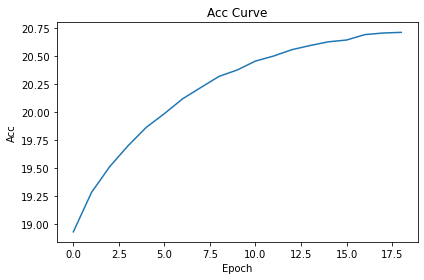

In [82]:
fig = plt.figure()
# ax = plt.axes()
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.title('Acc Curve')
plt.plot(acc_list)
plt.tight_layout()
plt.savefig('{}_acc_curve.png'.format(log_file[:-4]), bbox_inches='tight', transparent=True)
plt.show()
plt.close()

In [83]:
acc_list

[18.9309,
 19.2835,
 19.5138,
 19.6991,
 19.8635,
 19.9868,
 20.1193,
 20.2198,
 20.3194,
 20.3765,
 20.4561,
 20.5013,
 20.558,
 20.5949,
 20.628,
 20.6441,
 20.6922,
 20.7066,
 20.7124]

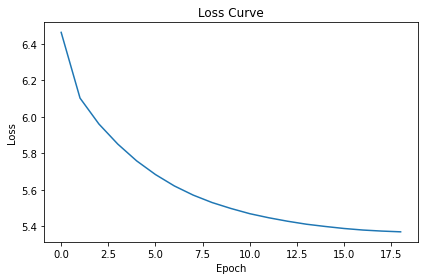

In [84]:
fig = plt.figure()
# ax = plt.axes()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Curve')
plt.plot(loss_list)
plt.tight_layout()
plt.savefig('{}_loss_curve.png'.format(log_file[:-4]), bbox_inches='tight', transparent=True)
plt.show()
plt.close()